In [127]:
import tensorflow as tf
import os

In [128]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [129]:
tf.config.list_physical_devices('GPU') 


[]

In [130]:
import cv2
import imghdr

In [131]:
data_dir='data'

In [132]:
image_exts=['jpeg','png','jpg','bmp']

In [133]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data/happy/.ipynb_checkpoints
Issue with image data/sad/.ipynb_checkpoints


In [134]:
import numpy as np
from matplotlib import pyplot as plt

In [135]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 330 files belonging to 2 classes.


In [136]:
data = data.map(lambda x,y: (x/255, y))

In [137]:
scaled_iterator=data.as_numpy_iterator()

In [138]:
batch=scaled_iterator.next()
#class 1 =sad
#class 0=happy

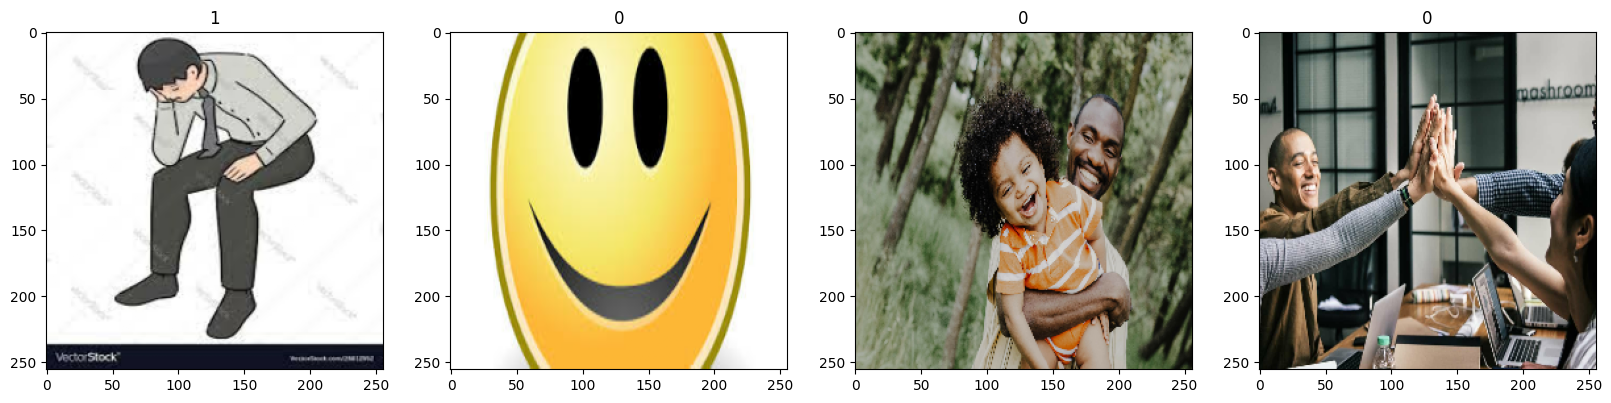

In [139]:
# Create a figure with 4 side-by-side subplots
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

# Initialize a counter variable
idx = 0

# Loop through the first 4 images in the batch
for img in batch[0][:4]:
    # Display each image in its respective subplot
    ax[idx].imshow(img)
    # Set the title of each subplot to the corresponding label
    ax[idx].title.set_text(batch[1][idx])
    # Increment the counter
    idx += 1

In [140]:
train_set=int(len(data)*.7)# batches 
cv_set=int(len(data)*.2)
test_set=int(len(data)*.1)+1

In [141]:
train = data.take(train_set)
val = data.skip(train_set).take(cv_set)
test = data.skip(train_set+cv_set).take(test_set)

In [142]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [143]:
model=Sequential()

In [144]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [145]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [146]:
logdir='logs'

In [147]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [148]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 715ms/step - accuracy: 0.5124 - loss: 1.0858 - val_accuracy: 0.5469 - val_loss: 0.6875
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 818ms/step - accuracy: 0.5838 - loss: 0.6770 - val_accuracy: 0.5938 - val_loss: 0.6519
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 797ms/step - accuracy: 0.5861 - loss: 0.6546 - val_accuracy: 0.7812 - val_loss: 0.6140
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 738ms/step - accuracy: 0.7558 - loss: 0.5937 - val_accuracy: 0.6875 - val_loss: 0.5888
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 833ms/step - accuracy: 0.7246 - loss: 0.4871 - val_accuracy: 0.7188 - val_loss: 0.4732
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 807ms/step - accuracy: 0.8498 - loss: 0.4129 - val_accuracy: 0.8125 - val_loss: 0.3801
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 828ms/step - accuracy: 0.8681 - loss: 0.3683 - val_accuracy: 0.9219 - val_loss: 0.2911
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 819ms/step - accuracy: 0.9161 - loss: 0.3090 - val_accuracy: 0.9062 - val_loss:

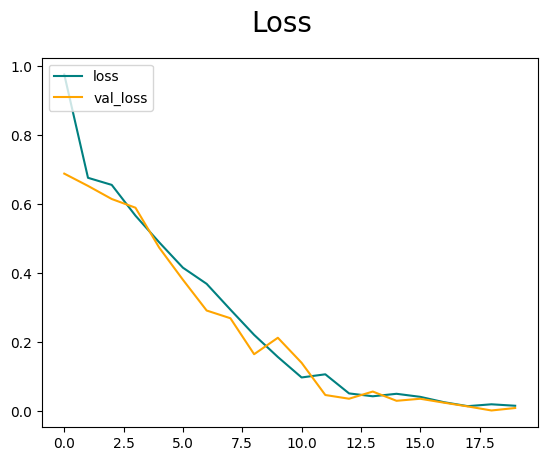

In [149]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

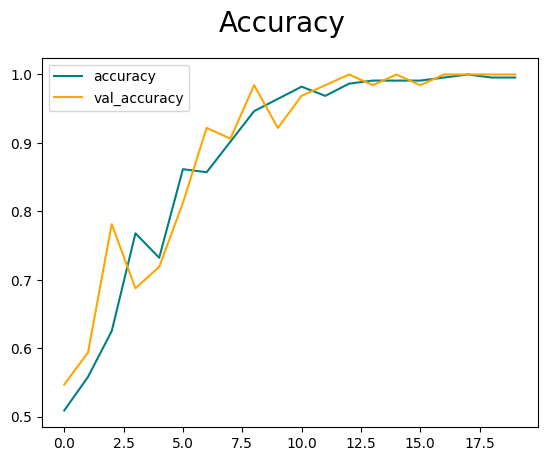

In [150]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [151]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [152]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [153]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


2024-09-04 23:40:31.772251: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [154]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


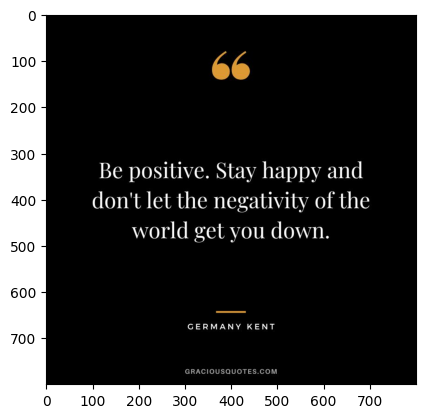

In [238]:
img = cv2.imread('img4.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

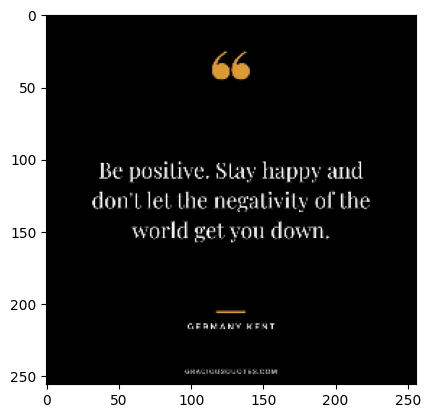

In [240]:
resize_img = tf.image.resize(img, (256,256))
plt.imshow(resize_img.numpy().astype(int))
plt.show()

In [242]:
yhat = model.predict(np.expand_dims(resize_img/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [244]:
from tensorflow.keras.models import load_model

In [246]:
model.save(os.path.join('models','HappySadModel.h5'))

In [248]:
best_model = load_model(os.path.join('models','HappySadModel.h5'))

In [250]:
ynewhat = best_model.predict(np.expand_dims(resize_img/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [252]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
